   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.0 MB/s eta 0:00:00


Dropdown(description='Selecciona Query:', options=('Análisis de Retención de Clientes (Clientes Activos vs. In…

Button(description='Ejecutar Query', style=ButtonStyle())

Output()

Dropdown(description='Predecir:', options=('Monto de Venta', 'Cantidad de Productos', 'Casos de Soporte', 'Tie…

DatePicker(value=None, description='Selecciona una fecha:')

Button(description='Predecir', style=ButtonStyle())

Output()

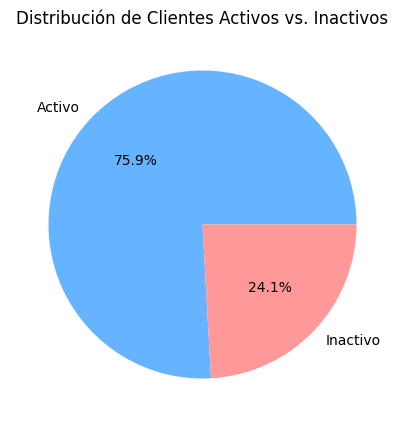

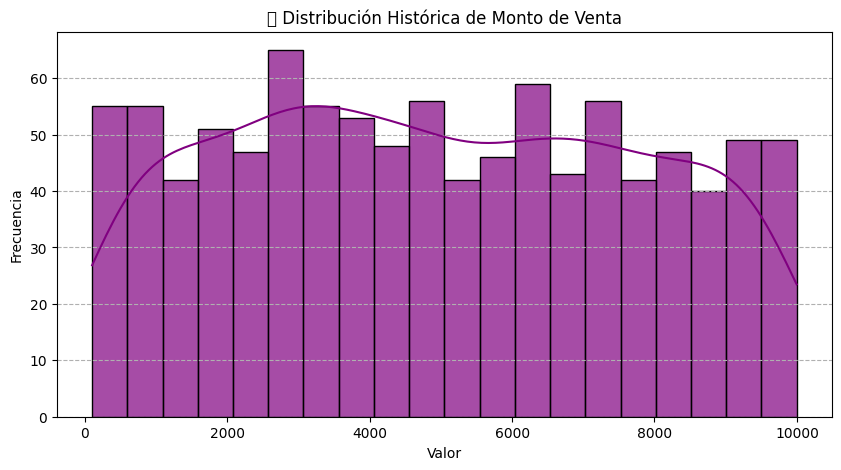


🔍 **Conclusión IA:**
📉 La predicción muestra una posible **disminución**, lo que puede requerir acciones estratégicas.


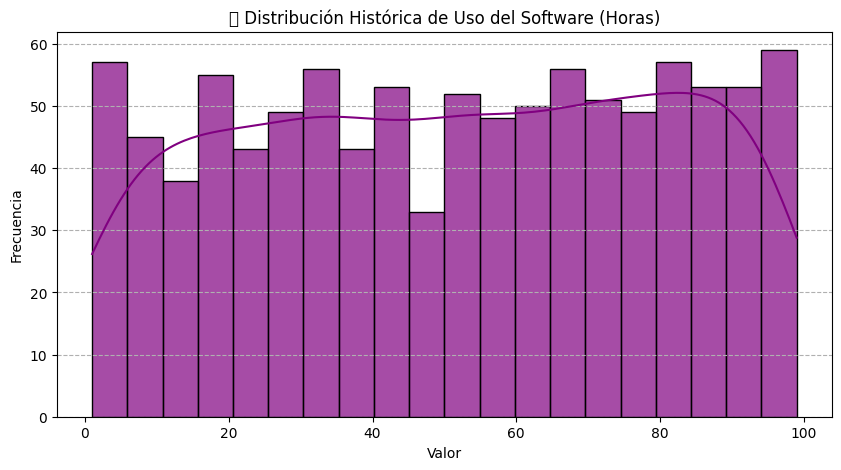


🔍 **Conclusión IA:**
📈 La predicción sugiere un **aumento** respecto al promedio histórico, indicando una tendencia alcista.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


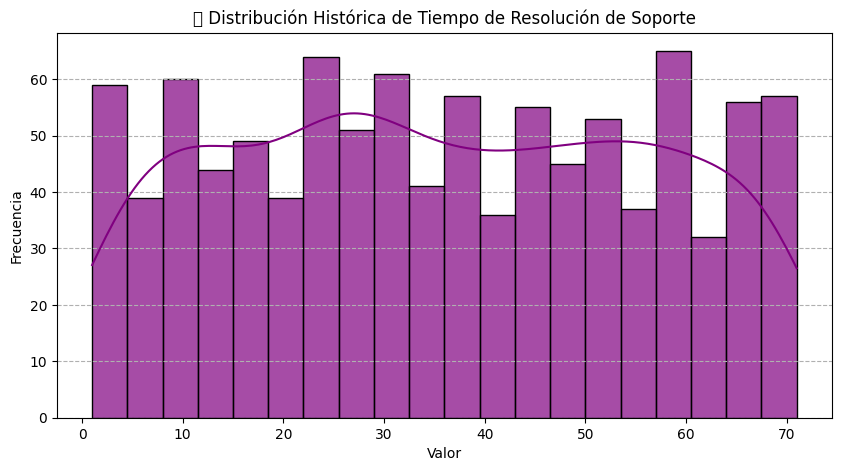


🔍 **Conclusión IA:**
📈 La predicción sugiere un **aumento** respecto al promedio histórico, indicando una tendencia alcista.


In [1]:
!pip install clickhouse-connect

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import clickhouse_connect
import ipywidgets as widgets
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Parámetros de conexión a ClickHouse
HOST = "d7m9cechvb.us-east1.gcp.clickhouse.cloud"
PORT = 8443
USER = "default"
PASSWORD = "z9F7aNDJO~g0V"
DATABASE = "default"

# Conectar a ClickHouse
client = clickhouse_connect.get_client(
    host=HOST,
    port=PORT,
    username=USER,
    password=PASSWORD,
    database=DATABASE,
    secure=True
)

# Diccionario con queries SQL
queries_dict = {
    "Análisis de Retención de Clientes (Clientes Activos vs. Inactivos)":
    """
WITH
    (SELECT max(Fecha) FROM datos_solutions_intel) AS Ultima_Fecha,
    (SELECT dateAdd(quarter, -1, Ultima_Fecha)) AS Limite_Trimestre

SELECT
    Cliente,
    COUNT(*) AS Total_Transacciones,
    SUM(Monto_Venta) AS Total_Compras,
    IF(MAX(Fecha) >= Limite_Trimestre, 'Activo', 'Inactivo') AS Estado_Cliente
FROM datos_solutions_intel
GROUP BY Cliente
ORDER BY Estado_Cliente DESC, Total_Compras DESC
""",
    "Cliente con Mayor monto de compra":
    """
SELECT Cliente, SUM(Monto_Venta) AS Total_Comprado
FROM datos_solutions_intel
GROUP BY Cliente
ORDER BY Total_Comprado DESC
LIMIT 10
""",
    "Promedio de Uso del Software por Sector":
    """
SELECT Sector, ROUND(AVG(Uso_Software_Horas), 2) AS Promedio_Uso_Horas
FROM datos_solutions_intel
GROUP BY Sector
ORDER BY Promedio_Uso_Horas DESC
""",
    "Tiempo Promedio de Resolución de Casos de Soporte por Sector":
    """
SELECT Sector, ROUND(AVG(Tiempo_Resolucion_Horas), 2) AS Tiempo_Promedio_Resolucion
FROM datos_solutions_intel
GROUP BY Sector
ORDER BY Tiempo_Promedio_Resolucion ASC
""",
    "Total de Ventas por Sector":
    """
SELECT Sector, SUM(Monto_Venta) AS Total_Ventas
FROM datos_solutions_intel
GROUP BY Sector
ORDER BY Total_Ventas DESC
""",
    "Ventas Mensuales en el Año 2023":
    """
SELECT toMonth(Fecha) AS Mes, SUM(Monto_Venta) AS Total_Ventas
FROM datos_solutions_intel
WHERE toYear(Fecha) = 2023
GROUP BY Mes
ORDER BY Mes
"""
}

# Widget de selección de consulta
dropdown_query = widgets.Dropdown(
    options=list(queries_dict.keys()),
    description="Selecciona Query:",
    style={'description_width': 'initial'}
)

# Botón para ejecutar la consulta y widget de salida
boton_ejecutar = widgets.Button(description="Ejecutar Query")
output = widgets.Output()

# Función para graficar los resultados según la consulta seleccionada
def graficar_query(df, query_name):
    plt.figure(figsize=(10, 5))

    if query_name == "Análisis de Retención de Clientes (Clientes Activos vs. Inactivos)":
        # Gráfico de pastel de clientes activos vs. inactivos
        conteo = df["Estado_Cliente"].value_counts()
        plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
        plt.title("Distribución de Clientes Activos vs. Inactivos")

    elif query_name == "Cliente con Mayor monto de compra":
        # Gráfico de barras de los 10 clientes con mayor compra
        sns.barplot(data=df, x="Total_Comprado", y="Cliente", palette="Blues_r")
        plt.xlabel("Monto Total Comprado")
        plt.ylabel("Cliente")
        plt.title("Top 10 Clientes con Mayor Monto de Compra")

    elif query_name == "Promedio de Uso del Software por Sector":
        # Gráfico de barras del uso promedio de software por sector
        sns.barplot(data=df, x="Promedio_Uso_Horas", y="Sector", palette="coolwarm")
        plt.xlabel("Promedio de Uso (Horas)")
        plt.ylabel("Sector")
        plt.title("Promedio de Uso del Software por Sector")

    elif query_name == "Tiempo Promedio de Resolución de Casos de Soporte por Sector":
        # Gráfico de barras del tiempo promedio de resolución por sector
        sns.barplot(data=df, x="Tiempo_Promedio_Resolucion", y="Sector", palette="magma")
        plt.xlabel("Tiempo Promedio de Resolución (Horas)")
        plt.ylabel("Sector")
        plt.title("Tiempo Promedio de Resolución de Casos de Soporte")

    elif query_name == "Total de Ventas por Sector":
        # Gráfico de barras del total de ventas por sector
        sns.barplot(data=df, x="Total_Ventas", y="Sector", palette="viridis")
        plt.xlabel("Total de Ventas")
        plt.ylabel("Sector")
        plt.title("Total de Ventas por Sector")

    elif query_name == "Ventas Mensuales en el Año 2023":
        # Gráfico de línea de ventas mensuales en 2023
        df["Mes"] = df["Mes"].astype(int)  # Asegurar que Mes es numérico
        df = df.sort_values("Mes")  # Ordenar los meses
        plt.plot(df["Mes"], df["Total_Ventas"], marker="o", linestyle="-", color="green")
        plt.xlabel("Mes")
        plt.ylabel("Total de Ventas")
        plt.title("Ventas Mensuales en el Año 2023")
        plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])

    plt.grid(True)
    plt.show()

# Función para ejecutar la consulta y mostrar los resultados + gráficos
def ejecutar_query(b):
    with output:
        output.clear_output()
        query_name = dropdown_query.value
        query_text = queries_dict[query_name].strip().rstrip(";")

        print(f"📌 Ejecutando Query: {query_name}\n")
        try:
            df_result = client.query_df(query_text)
            display(df_result)

            # Generar gráfico
            graficar_query(df_result, query_name)

        except Exception as e:
            print("❌ Error al ejecutar la consulta:", e)

# Conectar el botón con la función
boton_ejecutar.on_click(ejecutar_query)

# Mostrar widgets
display(dropdown_query, boton_ejecutar, output)




# Cargar los datos desde ClickHouse
query = """
SELECT Fecha, Monto_Venta, Cantidad_Productos, Casos_Soporte,
       Tiempo_Resolucion_Horas, Satisfaccion_Cliente, Uso_Software_Horas
FROM datos_solutions_intel
"""
df = client.query_df(query)

# Convertir 'Fecha' a formato datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Crear columna de Trimestre
df["Trimestre"] = df["Fecha"].dt.to_period("Q")

# Opciones de predicción
opciones_prediccion = {
    "Monto de Venta": "Monto_Venta",
    "Cantidad de Productos": "Cantidad_Productos",
    "Casos de Soporte": "Casos_Soporte",
    "Tiempo de Resolución de Soporte": "Tiempo_Resolucion_Horas",
    "Satisfacción del Cliente": "Satisfaccion_Cliente",
    "Uso del Software (Horas)": "Uso_Software_Horas"
}

# Widgets interactivos
seleccion_prediccion = widgets.Dropdown(
    options=list(opciones_prediccion.keys()),
    description="Predecir:",
    style={'description_width': 'initial'}
)
fecha_prediccion = widgets.DatePicker(description="Selecciona una fecha:")
boton_predecir = widgets.Button(description="Predecir")
output = widgets.Output()

# Mostrar widgets
display(seleccion_prediccion, fecha_prediccion, boton_predecir, output)

# Función para realizar la predicción y graficar
def predecir_datos(b):
    with output:
        output.clear_output()
        objetivo = opciones_prediccion[seleccion_prediccion.value]

        # Agrupar los datos por trimestre
        df_trimestral = df.groupby("Trimestre")[objetivo].mean().reset_index()
        df_trimestral["Fecha"] = df_trimestral["Trimestre"].astype(str).apply(lambda x: pd.Period(x).start_time)
        df_trimestral["Fecha_ordinal"] = df_trimestral["Fecha"].apply(lambda x: x.toordinal())

        # Separar en X (fechas) e y (valor a predecir)
        X = df_trimestral[["Fecha_ordinal"]]
        y = df_trimestral[objetivo]

        # Modelos combinados
        modelo_rf = RandomForestRegressor(n_estimators=150, random_state=42)
        modelo_rf.fit(X, y)

        modelo_poly = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
        modelo_poly.fit(X, y)

        # Predicción para la fecha seleccionada
        fecha_seleccionada = fecha_prediccion.value
        if fecha_seleccionada is None:
            print("Por favor, selecciona una fecha válida.")
            return
        fecha_pred_ordinal = np.array([[fecha_seleccionada.toordinal()]])
        prediccion_rf = modelo_rf.predict(fecha_pred_ordinal)[0]
        prediccion_poly = modelo_poly.predict(fecha_pred_ordinal)[0]

        # Ajuste con tendencia y estacionalidad
        tendencia = np.polyfit(df_trimestral["Fecha_ordinal"], y, 1)[0]
        tendencia_reciente = np.polyfit(df_trimestral["Fecha_ordinal"][-6:], y[-6:], 1)[0]

        # Peso adaptativo a tendencia reciente y largo plazo
        peso_tendencia = 0.6
        ajuste_tendencia = (tendencia_reciente * peso_tendencia) + (tendencia * (1 - peso_tendencia))

        # Ruido controlado basado en oscilaciones naturales
        cambio_std = np.std(np.diff(y[-8:])) * 0.6

        # Aplicamos todo al resultado final
        prediccion_final = (prediccion_rf + prediccion_poly) / 2 + ajuste_tendencia + np.random.uniform(-cambio_std, cambio_std)

        # Mostrar resultado
        print(f"\n📊 Predicción para '{seleccion_prediccion.value}' el {fecha_seleccionada}: {round(prediccion_final, 2)}")

        # Extender fechas para la predicción
        fechas_ext = pd.date_range(start=df_trimestral["Fecha"].min(), end=fecha_seleccionada, freq="Q")
        fechas_ext_ordinal = np.array([d.toordinal() for d in fechas_ext]).reshape(-1, 1)

        # Predicciones extendidas
        predicciones_rf = modelo_rf.predict(fechas_ext_ordinal)
        predicciones_poly = modelo_poly.predict(fechas_ext_ordinal)

        # Aplicamos tendencia combinada y variabilidad
        predicciones_finales = (predicciones_rf + predicciones_poly) / 2 + ajuste_tendencia
        predicciones_finales += np.sin(np.linspace(0, 2.5 * np.pi, len(fechas_ext))) * cambio_std * 0.8

        # 📊 GRAFICA 1: Evolución Trimestral + Predicción
        plt.figure(figsize=(12,6))
        plt.plot(df_trimestral["Fecha"], df_trimestral[objetivo], label="Datos Históricos", color="blue", linewidth=2)
        plt.plot(fechas_ext, predicciones_finales, label="Proyección Futura", color="red", linestyle="--", linewidth=2)
        plt.scatter(fecha_seleccionada, prediccion_final, color="red", marker="o", s=100, label="Predicción Puntual")

        plt.title(f"📈 Evolución Trimestral de {seleccion_prediccion.value}")
        plt.xlabel("Fecha")
        plt.ylabel(seleccion_prediccion.value)
        plt.legend()
        plt.grid(True)
        plt.show()

        # 📊 GRAFICA 2: Promedio Trimestral
        plt.figure(figsize=(10,5))
        sns.barplot(x=df_trimestral["Trimestre"].astype(str), y=df_trimestral[objetivo], color="royalblue", alpha=0.8)
        plt.xticks(rotation=45)
        plt.title(f"📊 Promedio Trimestral de {seleccion_prediccion.value}")
        plt.xlabel("Trimestre")
        plt.ylabel("Valor Promedio")
        plt.grid(axis="y", linestyle="--")
        plt.show()

        # 📊 GRAFICA 3: Distribución de valores históricos
        plt.figure(figsize=(10,5))
        sns.histplot(df[objetivo], kde=True, bins=20, color="purple", alpha=0.7)
        plt.title(f"📊 Distribución Histórica de {seleccion_prediccion.value}")
        plt.xlabel("Valor")
        plt.ylabel("Frecuencia")
        plt.grid(axis="y", linestyle="--")
        plt.show()

        # 🧠 CONCLUSION AUTOMÁTICA
        print("\n🔍 **Conclusión IA:**")
        if prediccion_final > y.mean():
            print("📈 La predicción sugiere un **aumento** respecto al promedio histórico, indicando una tendencia alcista.")
        elif prediccion_final < y.mean():
            print("📉 La predicción muestra una posible **disminución**, lo que puede requerir acciones estratégicas.")
        else:
            print("🔄 La predicción se mantiene estable en relación con los valores previos, sin cambios significativos.")

# Conectar el botón con la función
boton_predecir.on_click(predecir_datos)
